## Analyze Results:

I will use the full train results with using dence layers. 

* Load csv file. 
* Categorize the results by MAPE
* Check the correlation between MAPE and other features.


### Import libraies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helper_functions import subplot_by_category

In [2]:
df = pd.read_csv("dense_results_full_data.csv")
df.describe()

,Country,MAPE,Density,Active
count,3135.000000,3135.000000,3135.000000,3.135000e+03
mean,30376.037640,27.996707,4.006963,6.797221e+03
std,15145.862593,1269.835687,6.160199,3.453032e+04
min,1001.000000,0.175896,0.000000,0.000000e+00
25%,18178.000000,1.800255,1.704740,1.495000e+02
50%,29173.000000,3.101383,2.687274,5.130000e+02
75%,45076.000000,5.295601,4.663819,2.209500e+03
max,56045.000000,71091.580000,227.756650,1.153292e+06


In [21]:
df.head()

,Country,MAPE,Density,Active,forecast,category
0,1001,1.504614,3.463856,1472,tf.Tensor(\n[3.3091352 3.3172703 3.3280153 3.3...,2
1,1003,4.143341,8.359798,14320,tf.Tensor(\n[7.858338 7.8851886 7.9074492 7.9...,2
2,1005,1.395184,1.232074,244,tf.Tensor(\n[1.1614107 1.1651304 1.1701925 1.1...,1
3,1007,5.228748,1.287240,229,tf.Tensor(\n[1.222997 1.2201089 1.2209381 1.2...,2
4,1009,1.442244,1.831783,813,tf.Tensor(\n[1.7523701 1.7636061 1.7706515 1.7...,1


In [3]:
df.corr()

,Country,MAPE,Density,Active
Country,1.000000,-0.002846,-0.002241,-0.060420
MAPE,-0.002846,1.000000,-0.011386,-0.003785
Density,-0.002241,-0.011386,1.000000,0.278538
Active,-0.060420,-0.003785,0.278538,1.000000


Same as sample data, there are no correlation between MAPE to other variables. 

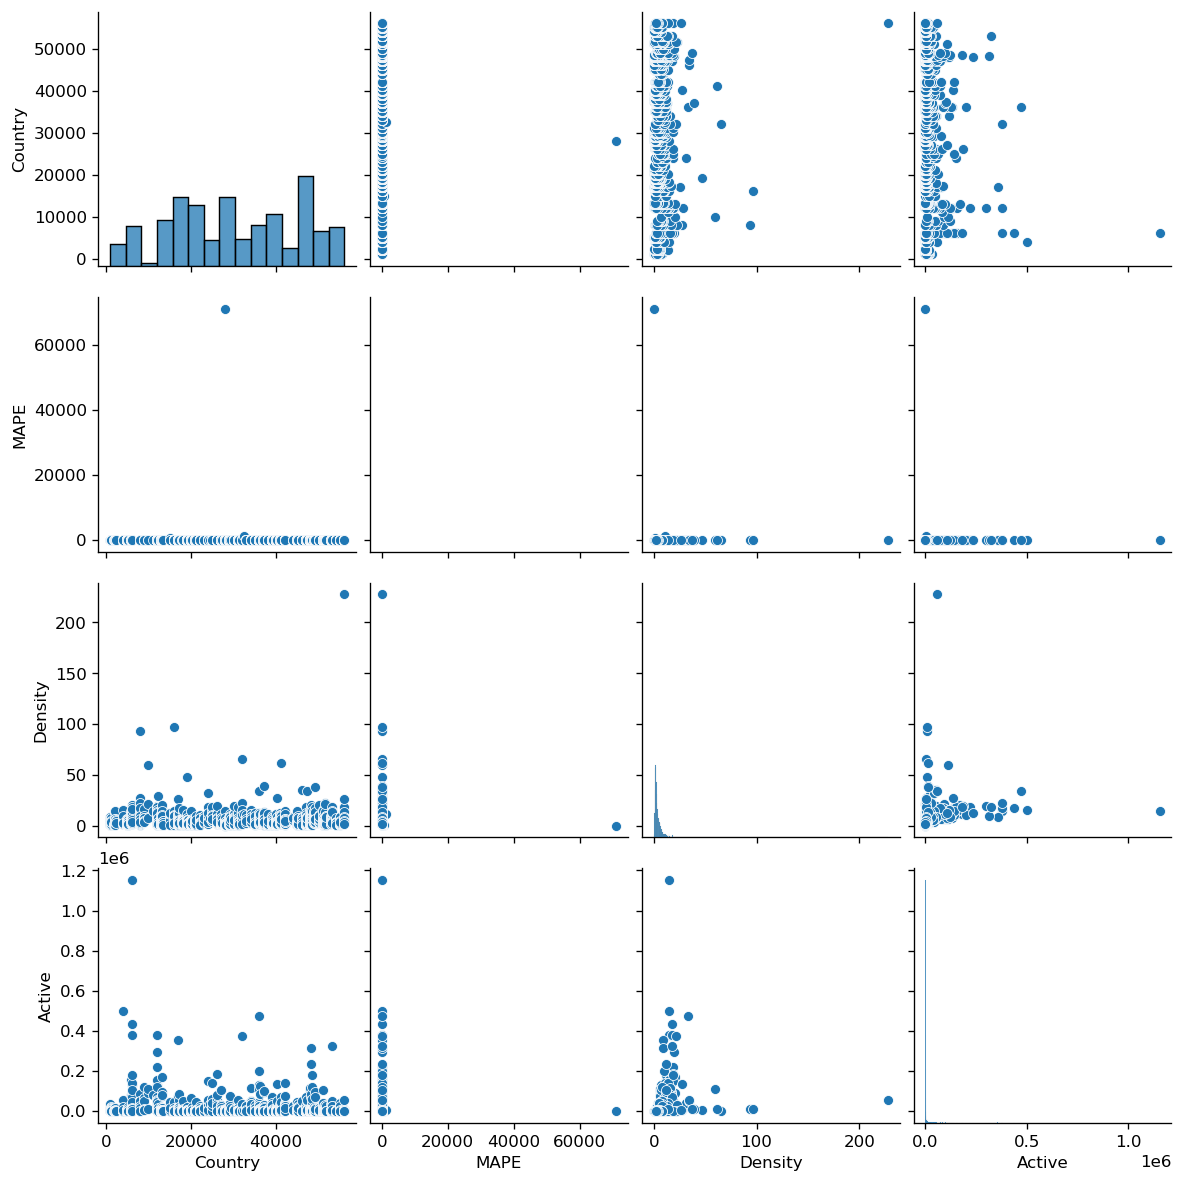

In [4]:
sns.pairplot(df)

In [5]:
df['category'] = pd.cut(df['MAPE'], bins=[0, 1.5, max(df['MAPE'])], labels=[1, 2])

In [6]:
df.groupby('category').agg({'MAPE': ['count', 'mean', 'min', 'max'],
                           "Density": ['min', 'max', 'std'],
                           'Active': ['min', 'max', 'std']})

MAPE                                      Density              \
         count       mean       min           max       min         max   
category                                                                  
1          609   1.032528  0.175896      1.499255  0.250684   37.714901   
2         2526  34.497572  1.502808  71091.580000  0.000000  227.756650   

                   Active                         
               std    min      max           std  
category                                          
1         3.932820      1   499989  35556.982612  
2         6.580683      0  1153292  34277.705251

Category: 1
Length of DataFrame: 609


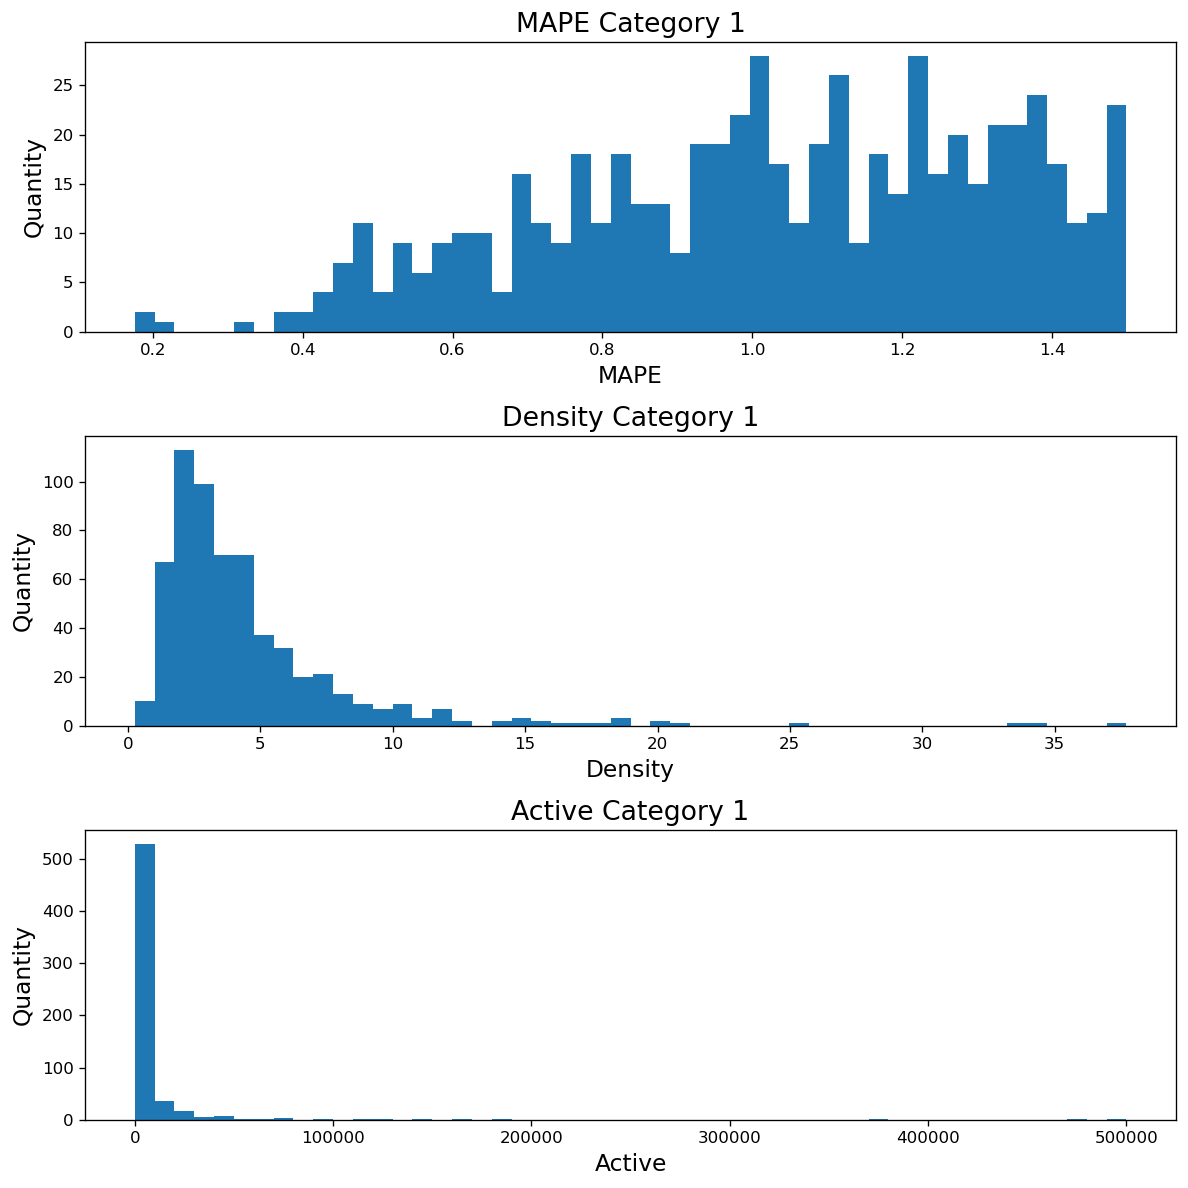

Category: 2
Length of DataFrame: 2526


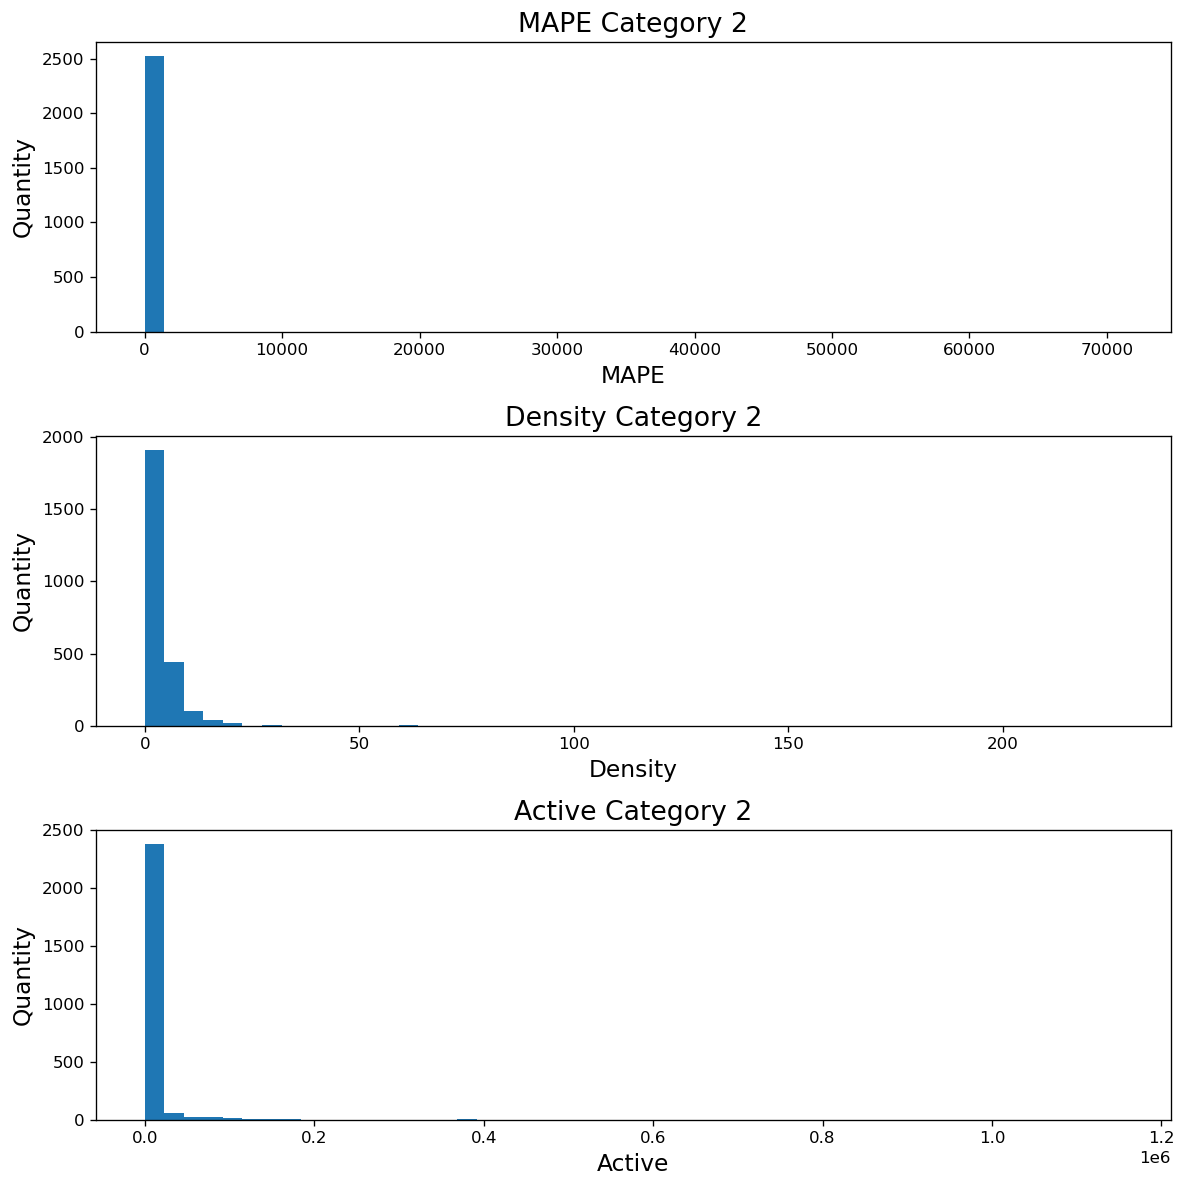

In [8]:
for i in range(1, 3):
    subplot_by_category(df, i)

In [16]:
df.to_csv("result_dense_with_category", index=False)

### Things to do:

* Check category 2 with same values for prediction. 
    See if the score beat the results. 
* Based on the results, I will tweek the category boundry to maximize the MAPE. 

In [14]:
# Obtain the cfips on category 2
cfips_category2 = df[df['category'] == 2]['Country'].unique()

In [15]:
category_1 = 0
category_2 = 0
for i in range(len(df)):
    # If the cfips in the category 2, then train with linear regression and update MAPE
    if df['Country'][i] in cfips_category2:
        category_2 += 1
    # If category 1, keep the MAPE score
    else:
        category_1 += 1
print(f"number category 1: {category_1}\nnumber category 2: {category_2}")

number category 1: 609
number category 2: 2526


In [19]:
df[df["Country"] == 1001]['MAPE']

0    1.504614
Name: MAPE, dtype: float64

In [20]:
df['Country'].iloc[0]

1001